<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/PLS_SEM_Analysis_for_Impact_Fidelity_using_R_in_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:


%%R

# Install required packages
install.packages("tidyverse")
install.packages("seminr")
install.packages("plspm")
install.packages("DiagrammeR")
install.packages("dplyr")



# Load libraries
library(tidyverse)
library(seminr)
library(plspm)
library(DiagrammeR)
library(dplyr)

# Read the CSV file
df_ImpactFidelity <- read.csv("/content/SE_ImpactFidelity_272.csv")

# Create subset of data
subset_data <- df_ImpactFidelity %>%
  select(starts_with("Impact_Fidelity"), starts_with("Mission_Drift"))

# Define measurement model
measurement_model <- constructs(
  reflective("ImpactFidelity", c("Impact_Fidelity1", "Impact_Fidelity2",
                                "Impact_Fidelity3", "Impact_Fidelity4",
                                "Impact_Fidelity5")),
  reflective("MissionDrift", c("Mission_Drift1", "Mission_Drift2",
                              "Mission_Drift3", "Mission_Drift4",
                              "Mission_Drift5"))
)

# Define structural model
structural_model <- relationships(
  paths(from = "ImpactFidelity", to = "MissionDrift")
)

# Estimate model
pls_model <- estimate_pls(
  data = subset_data,
  measurement_model = measurement_model,
  structural_model = structural_model
)

# Define full measurement model
full_measurement_model <- constructs(
  reflective("ImpactFidelity", c("Impact_Fidelity1", "Impact_Fidelity2",
                                "Impact_Fidelity3", "Impact_Fidelity4",
                                "Impact_Fidelity5")),
  reflective("MissionDrift", c("Mission_Drift1", "Mission_Drift2",
                              "Mission_Drift3", "Mission_Drift4",
                              "Mission_Drift5")),
  reflective("InternalPressures", c("Internal_Pressures1", "Internal_Pressures2",
                                   "Internal_Pressures3", "Internal_Pressures4",
                                   "Internal_Pressures5")),
  reflective("ExternalPressures", c("External_Pressures1", "External_Pressures2",
                                   "External_Pressures3", "External_Pressures4",
                                   "External_Pressures5")),
  reflective("GovernanceMechanisms", c("Governance_Mechanisms1", "Governance_Mechanisms2",
                                      "Governance_Mechanisms3", "Governance_Mechanisms4",
                                      "Governance_Mechanisms5")),
  reflective("InvestorInvolvement", c("Investor_Involvement1", "Investor_Involvement2",
                                     "Investor_Involvement3", "Investor_Involvement4",
                                     "Investor_Involvement5")),
  reflective("ImpactMeasurement", c("Impact_Measurement1", "Impact_Measurement2",
                                   "Impact_Measurement3", "Impact_Measurement4",
                                   "Impact_Measurement5")),
  reflective("IntegrationOfImpact", c("Integration_Of_Impact1", "Integration_Of_Impact2",
                                     "Integration_Of_Impact3")),
  reflective("MonitoringStrategies", c("Monitoring_Strategies1", "Monitoring_Strategies2",
                                      "Monitoring_Strategies3")),
  reflective("AlignmentStrategies", c("Alignment_Strategies1", "Alignment_Strategies2",
                                     "Alignment_Strategies3"))
)

# Define full structural model
full_structural_model <- relationships(
  paths(from = c("GovernanceMechanisms", "InvestorInvolvement",
                 "ImpactMeasurement", "IntegrationOfImpact"),
       to = "ImpactFidelity"),
  paths(from = c("InternalPressures", "ExternalPressures"),
       to = "MissionDrift"),
  paths(from = c("MonitoringStrategies", "AlignmentStrategies"),
       to = "ImpactFidelity")
)

# Estimate full model
full_pls_model <- estimate_pls(
  data = df_ImpactFidelity,
  measurement_model = full_measurement_model,
  structural_model = full_structural_model
)

# Get summary of results
summary(full_pls_model)

# Bootstrap for significance testing
boot_model <- bootstrap_model(full_pls_model, nboot = 1000)
summary(boot_model)

# Save results to files that can be downloaded from Colab
# write.csv(pls_model$path_coefs, "path_coefficients.csv")
# write.csv(pls_model$inner_summary, "model_summary.csv")
# write.csv(pls_model$gof, "model_gof.csv")


(as ‘lib’ is unspecified)







	‘/tmp/Rtmpv5qgig/downloaded_packages’

(as ‘lib’ is unspecified)
































































	‘/tmp/Rtmpv5qgig/downloaded_packages’

(as ‘lib’ is unspecified)


































	‘/tmp/Rtmpv5qgig/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpv5qgig/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpv5qgig/downloaded_packages’



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: ‘seminr’



    rerun


Attaching package: ‘plspm’



    alpha


Attaching package: ‘DiagrammeR’



    get_paths











Results from Bootstrap resamples:  1000

Bootstrapped Structural Paths:
                                         Original Est. Bootstrap Mean
GovernanceMechanisms  ->  ImpactFidelity         0.365          0.234
InvestorInvolvement  ->  ImpactFidelity         -0.416          0.093
ImpactMeasurement  ->  ImpactFidelity            0.491          0.610
IntegrationOfImpact  ->  ImpactFidelity          0.480          0.017
InternalPressures  ->  MissionDrift              0.090          0.102
ExternalPressures  ->  MissionDrift              0.297          0.304
MonitoringStrategies  ->  ImpactFidelity        -1.523         -0.129
AlignmentStrategies  ->  ImpactFidelity          1.623          0.164
                                         Bootstrap SD T Stat. 2.5% CI 97.5% CI
GovernanceMechanisms  ->  ImpactFidelity        1.635   0.223  -0.367    0.794
InvestorInvolvement  ->  ImpactFidelity         5.733  -0.072  -2.578    2.341
ImpactMeasurement  ->  ImpactFidelity           1.465   0.33

### Show Output

In [7]:
%%R

# Show Output
summary(full_pls_model)


Results from  package seminr (2.3.4)

Path Coefficients:
                     ImpactFidelity MissionDrift
R^2                           0.757        0.134
AdjR^2                        0.751        0.128
GovernanceMechanisms          0.365            .
InvestorInvolvement          -0.416            .
ImpactMeasurement             0.491            .
IntegrationOfImpact           0.480            .
InternalPressures                 .        0.090
ExternalPressures                 .        0.297
MonitoringStrategies         -1.523            .
AlignmentStrategies           1.623            .

Reliability:
                     alpha  rhoC   AVE  rhoA
GovernanceMechanisms 0.825 0.816 0.480 0.847
InvestorInvolvement  0.887 0.890 0.622 0.905
ImpactMeasurement    0.815 0.815 0.472 0.823
IntegrationOfImpact  0.818 0.826 0.619 0.852
InternalPressures    0.842 0.841 0.519 0.857
ExternalPressures    0.810 0.786 0.446 0.840
MonitoringStrategies 0.733 0.798 0.588 0.876
AlignmentStrategies  0.722 0.

In [5]:
%%R



# Bootstrap for significance testing
boot_model <- bootstrap_model(full_pls_model, nboot = 1000)
summary(boot_model)


Results from Bootstrap resamples:  1000

Bootstrapped Structural Paths:
                                         Original Est. Bootstrap Mean
GovernanceMechanisms  ->  ImpactFidelity         0.365          0.264
InvestorInvolvement  ->  ImpactFidelity         -0.416          0.207
ImpactMeasurement  ->  ImpactFidelity            0.491          0.575
IntegrationOfImpact  ->  ImpactFidelity          0.480         -0.089
InternalPressures  ->  MissionDrift              0.090          0.092
ExternalPressures  ->  MissionDrift              0.297          0.314
MonitoringStrategies  ->  ImpactFidelity        -1.523         -0.150
AlignmentStrategies  ->  ImpactFidelity          1.623          0.192
                                         Bootstrap SD T Stat. 2.5% CI 97.5% CI
GovernanceMechanisms  ->  ImpactFidelity        1.447   0.252  -0.282    0.759
InvestorInvolvement  ->  ImpactFidelity         3.901  -0.107  -1.796    2.028
ImpactMeasurement  ->  ImpactFidelity           0.501   0.97

## Based on the output from the seminr package, I'll interpret the results and Reporting ther PLS-SEM analysis:

## Measurement Model Assessment:
### Internal consistency reliability: Cronbach's alpha (alpha) and composite reliability (rhoC) are above 0.7 for all constructs, indicating good reliability.
### Convergent validity: Average Variance Extracted (AVE) is below the recommended 0.5 threshold for GovernanceMechanisms (0.480), ImpactMeasurement (0.472), ExternalPressures (0.446), and ImpactFidelity (0.472).
## This suggests potential issues with convergent validity for these constructs.
### Discriminant validity: The output doesn't provide Fornell-Larcker or HTMT values, so you'd need to calculate these separately.
## Structural Model Assessment:
### R² values: ImpactFidelity has an R² of 0.757, indicating that 75.7% of its variance is explained by the model. MissionDrift has an R² of 0.134, suggesting only 13.4% of its variance is explained.
### Path coefficients: The most substantial effects are from MonitoringStrategies (-1.523) and AlignmentStrategies (1.623) to ImpactFidelity. However, the bootstrapped confidence intervals for these paths include zero, indicating they may not be statistically significant.
### Effect sizes (f²) and Q² values are not provided in this output and would need to be calculated separately.

## Multicollinearity:
### VIF values are not provided in this output and would need to be calculated separately.
## Bootstrapping Results:
### The bootstrap results show that most path coefficients have wide confidence intervals that include zero, suggesting potential issues with statistical significance.
## Hypothesis Testing Results:
### Based on the bootstrap results, you may need to reject hypotheses related to most of the paths, as their confidence intervals include zero. The only exceptions appear to be ImpactMeasurement -> ImpactFidelity and ExternalPressures -> MissionDrift.

### To create a path diagram using R, you can use the DiagrammeR package. Here's an example of how you might create a basic path diagram:

In [9]:
%%R

library(DiagrammeR)

pathDiagram = grViz("
  digraph PLS_model {
    rankdir=LR;
    node [shape=box];

    GM [label='Governance\nMechanisms'];
    II [label='Investor\nInvolvement'];
    IM [label='Impact\nMeasurement'];
    IoI [label='Integration\nof Impact'];
    IP [label='Internal\nPressures'];
    EP [label='External\nPressures'];
    MS [label='Monitoring\nStrategies'];
    AS [label='Alignment\nStrategies'];
    IF [label='Impact\nFidelity'];
    MD [label='Mission\nDrift'];

    GM -> IF [label='0.365'];
    II -> IF [label='-0.416'];
    IM -> IF [label='0.491'];
    IoI -> IF [label='0.480'];
    IP -> MD [label='0.090'];
    EP -> MD [label='0.297'];
    MS -> IF [label='-1.523'];
    AS -> IF [label='1.623'];

    {rank=same; GM II IM IoI MS AS}
    {rank=same; IP EP}
    {rank=same; IF MD}
  }
")

print(pathDiagram)

### Let's un the Python code to enable custom widget support:

In [1]:
from google.colab import output
output.enable_custom_widget_manager()

### Then, in a new cell, we can use the %%R magic command to run your R code:

In [6]:
%%R
install.packages("DiagrammeR")

(as ‘lib’ is unspecified)



















	‘/tmp/RtmpEGsFPs/downloaded_packages’



In [8]:

%%R

library(DiagrammeR)

pathDiagram = grViz("
  digraph PLS_model {
    rankdir=LR;
    node [shape=box];

    GM [label='Governance\nMechanisms'];
    II [label='Investor\nInvolvement'];
    IM [label='Impact\nMeasurement'];
    IoI [label='Integration\nof Impact'];
    IP [label='Internal\nPressures'];
    EP [label='External\nPressures'];
    MS [label='Monitoring\nStrategies'];
    AS [label='Alignment\nStrategies'];
    IF [label='Impact\nFidelity'];
    MD [label='Mission\nDrift'];

    GM -> IF [label='0.365'];
    II -> IF [label='-0.416'];
    IM -> IF [label='0.491'];
    IoI -> IF [label='0.480'];
    IP -> MD [label='0.090'];
    EP -> MD [label='0.297'];
    MS -> IF [label='-1.523'];
    AS -> IF [label='1.623'];

    {rank=same; GM II IM IoI MS AS}
    {rank=same; IP EP}
    {rank=same; IF MD}
  }
")

pathDiagram

#### Save the path diagram as an image and then displaying it using Python:


In [12]:
%%R
install.packages(c("DiagrammeR", "DiagrammeRsvg", "rsvg"))
library(DiagrammeR)
library(DiagrammeRsvg)
library(rsvg)

(as ‘lib’ is unspecified)
























	‘/tmp/RtmpEGsFPs/downloaded_packages’



 




Error in library(rsvg) : there is no package called ‘rsvg’


### Next, try to create and export the graph using a different method:

[1] TRUE


### For Google Colab (which runs on Ubuntu), we need to install the system dependencies first. Run this in a code cell;

### After installing the system dependencies, try to install the R package:

In [14]:
!sudo apt-get update
!sudo apt-get install -y librsvg2-dev

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,458 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,611 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,4

In [15]:
%%R
install.packages("rsvg")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpEGsFPs/downloaded_packages’



### After installing the system dependencies, try to install the R package again:

### If you're still having issues, you can try installing from GitHub:
  

In [16]:
### After installing the system dependencies, try to install the R package again:

### If you're still having issues, you can try installing from GitHub:

%%R
if (!requireNamespace("remotes", quietly = TRUE)) install.packages("remotes")
remotes::install_github("jeroen/rsvg")


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpEGsFPs/remotesb118927e2b/ropensci-rsvg-40978e8/DESCRIPTION’ ... OK
* preparing ‘rsvg’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* running ‘cleanup’
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘rsvg_2.6.1.tar.gz’



(as ‘lib’ is unspecified)



In [17]:
%%R
library(rsvg)


In [19]:
%%R
library(DiagrammeR)
library(DiagrammeRsvg)
library(rsvg)

pathDiagram <- grViz("
  digraph PLS_model {
    rankdir=LR;
    node [shape=box];

    GM [label='Governance\nMechanisms'];
    II [label='Investor\nInvolvement'];
    IM [label='Impact\nMeasurement'];
    IoI [label='Integration\nof Impact'];
    IP [label='Internal\nPressures'];
    EP [label='External\nPressures'];
    MS [label='Monitoring\nStrategies'];
    AS [label='Alignment\nStrategies'];
    IF [label='Impact\nFidelity'];
    MD [label='Mission\nDrift'];

    GM -> IF [label='0.365'];
    II -> IF [label='-0.416'];
    IM -> IF [label='0.491'];
    IoI -> IF [label='0.480'];
    IP -> MD [label='0.090'];
    EP -> MD [label='0.297'];
    MS -> IF [label='-1.523'];
    AS -> IF [label='1.623'];

    {rank=same; GM II IM IoI MS AS}
    {rank=same; IP EP}
    {rank=same; IF MD}
  }
")

# Export as SVG first
svg_content <- DiagrammeRsvg::export_svg(pathDiagram)

# Convert SVG to PNG
rsvg::rsvg_png(charToRaw(svg_content), "path_diagram.png")

# Check if the file was created
file.exists("path_diagram.png")

[1] TRUE


### If the above code runs without errors and the last line returns TRUE, then the PNG file has been successfully created. We can then display it using Python:

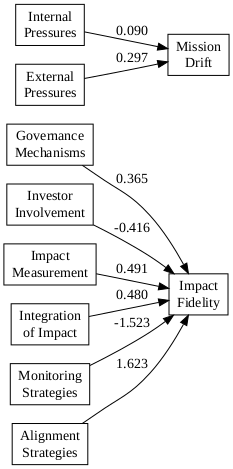

In [20]:
from IPython.display import Image
Image(filename='path_diagram.png')
